 38%|███▊      | 379/1000 [00:11<00:19, 31.91it/s]


Simulation interrupted by user.


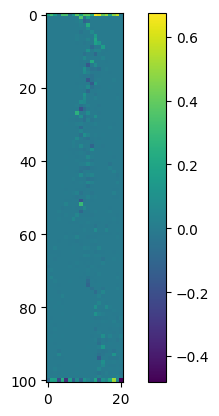

In [3]:
from CA import *
from initial_state_generation import *
import matplotlib.pyplot as plt

if __name__ == "__main__":
    # Example usage
    np.random.seed(42)
    width, height, ground_height = 21, 101, 101*.1
    
    initial_state = generate_initial_slope(height, width, ground_height, noise_amplitude = 0.2, noise_type = 'white')
    
    output_file = '../videos/water_simulation.mp4'
    ca = CA(width, height, initial_state, neighbor_list=BOTTOM_NEIGHBORS)
    ca.run_simulation(1000, show_live=True)
    
    plt.imshow(ca.grid[:,:,GROUND_HEIGHT] - initial_state[:,:,GROUND_HEIGHT])
    plt.colorbar()
    
    plt.savefig('../data/test.png')
    
    

In [28]:

def entropy(vec):
    vec = vec / np.sum(vec)
    entropy = 0
    for i, val in enumerate(vec):
        if val > 1e-9:
            entropy += val*np.log2(val)
    return entropy

def plot_entropies(grid):
    entropies = np.zeros(101)
    for i, row in enumerate(grid[:-1]):
        # print(row)
        entropies[i] = (entropy(np.maximum(0,row[:,WATER_HEIGHT])))
    plt.title('mean entropy {}'.format(np.mean(entropies)))
    plt.plot(entropies)
    plt.show()

/tmp/ipykernel_17821/1621461284.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(grids[-1,:,:,WATER_HEIGHT] * (grids[-1,:,:,WATER_HEIGHT] > 1e-6)) )


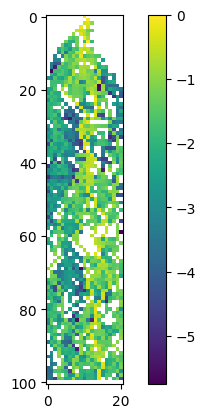

/tmp/ipykernel_17821/1621461284.py:48: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(grids[-1,:,:,WATER_HEIGHT] * (grids[-1,:,:,WATER_HEIGHT] > 1e-6)) )


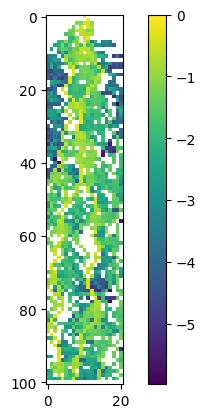

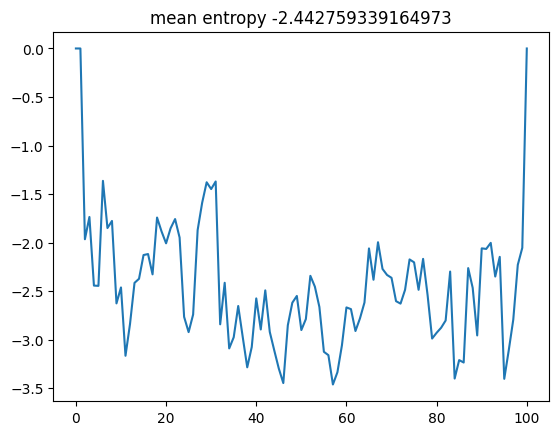

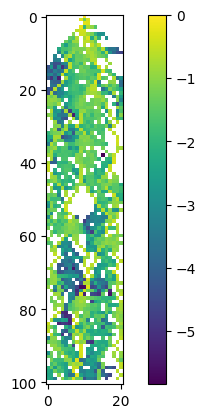

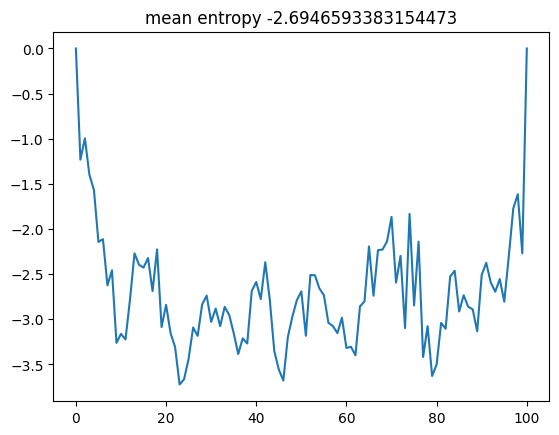

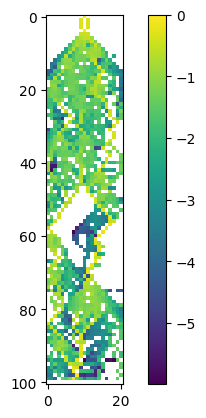

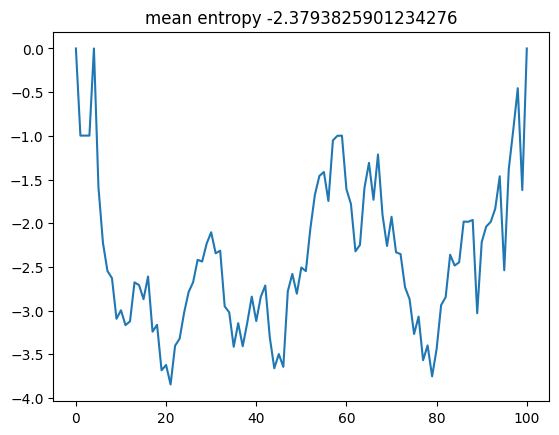

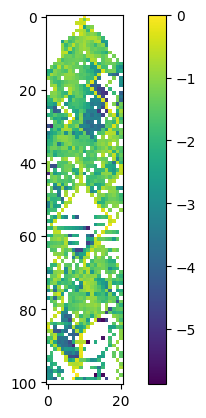

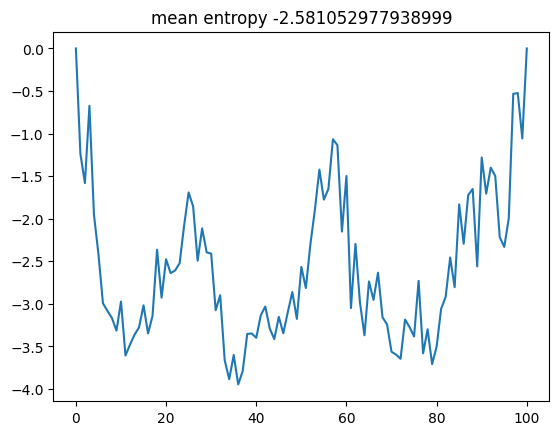

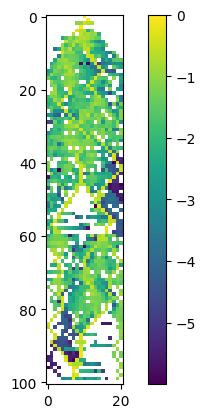

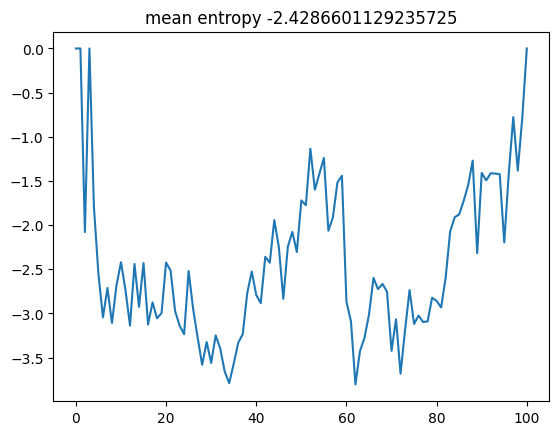

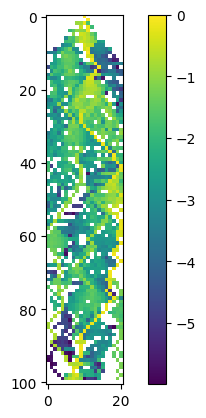

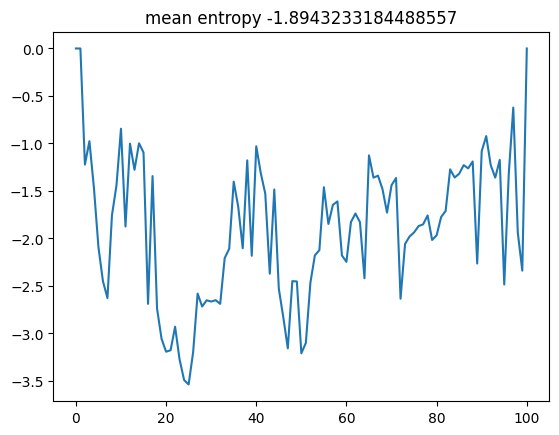

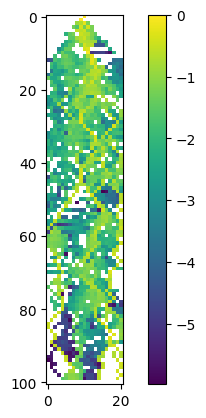

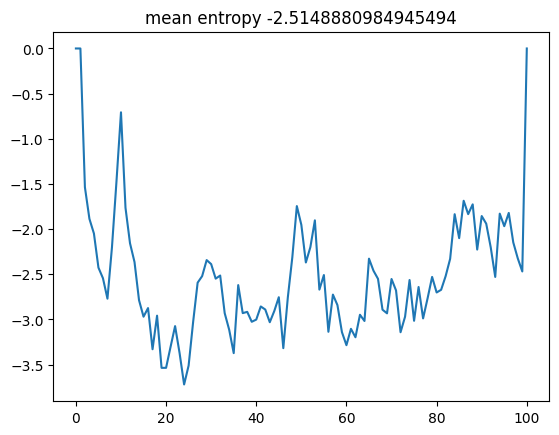

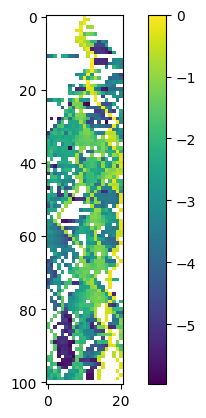

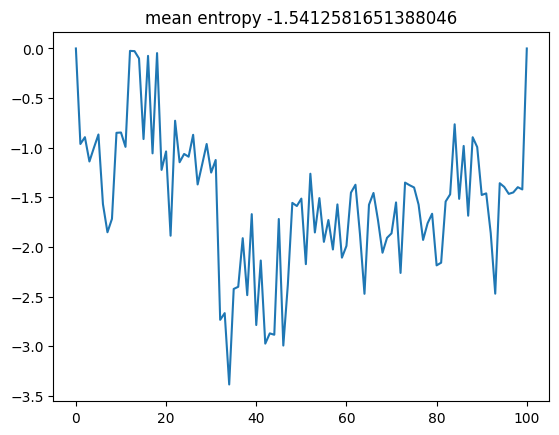

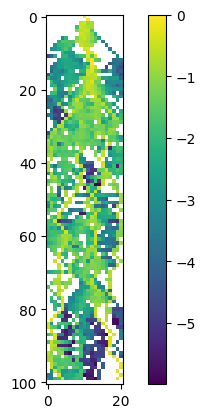

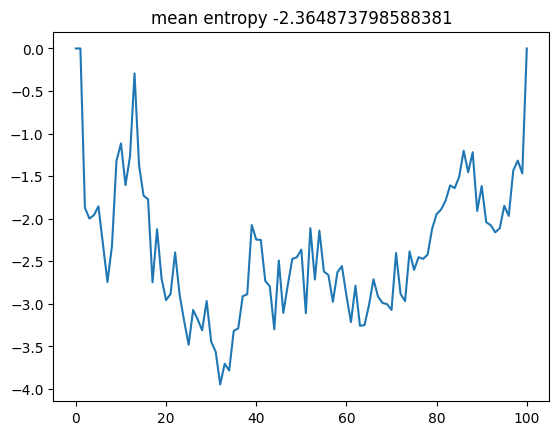

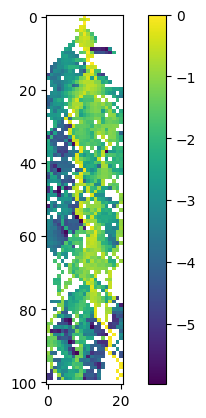

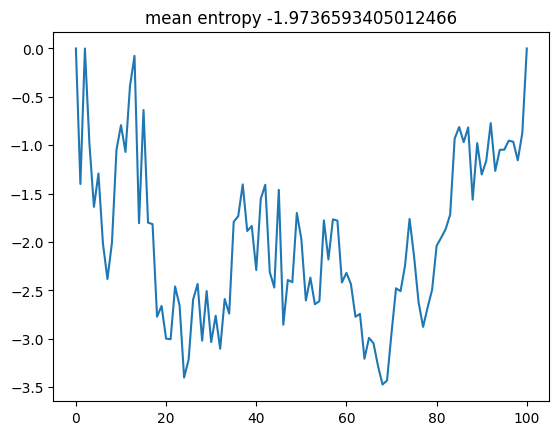

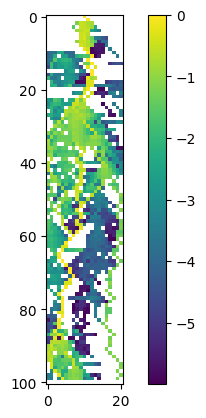

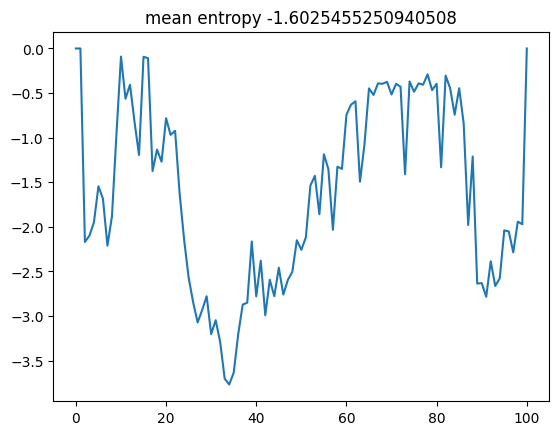

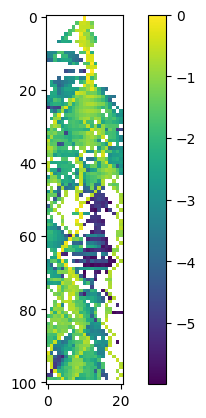

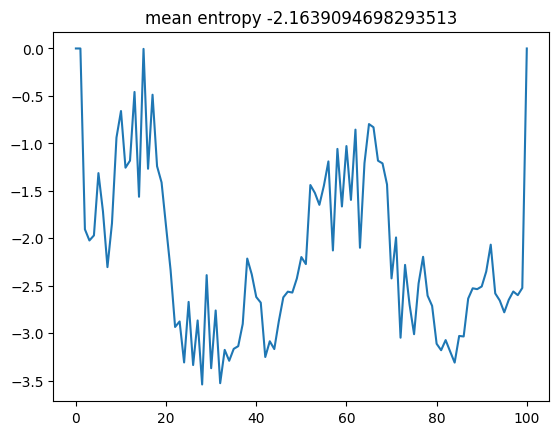

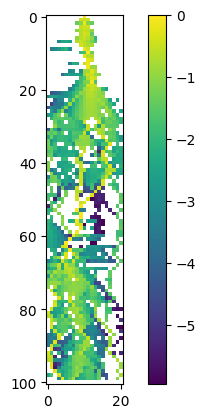

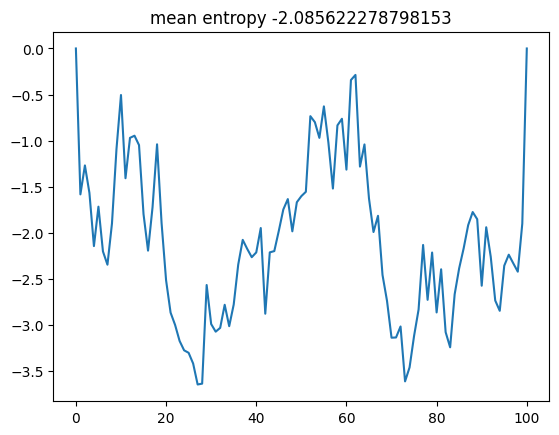

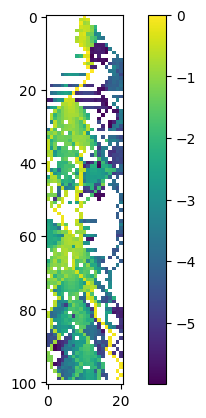

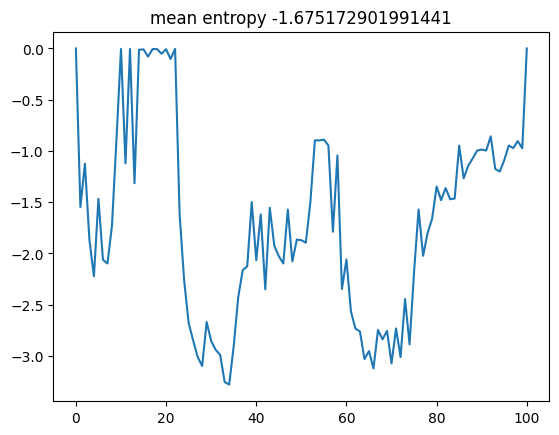

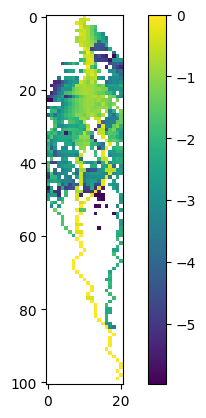

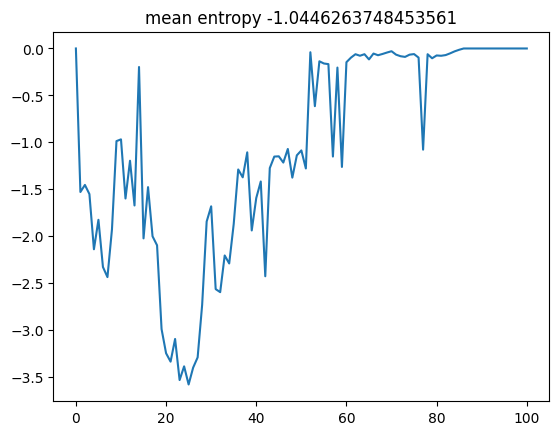

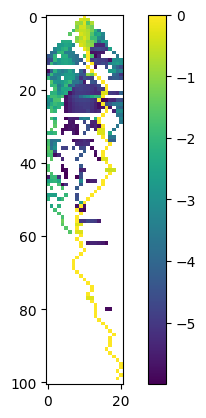

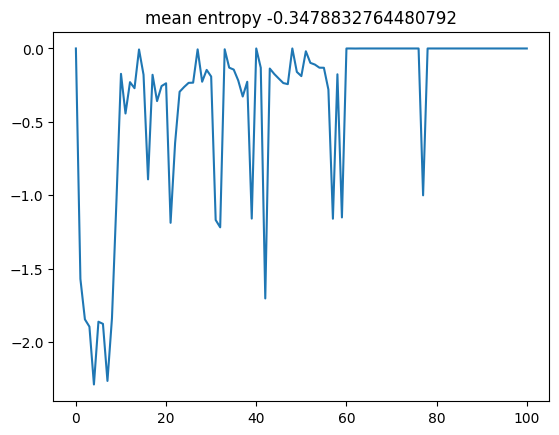

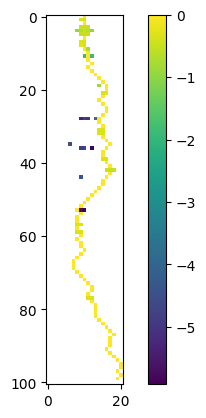

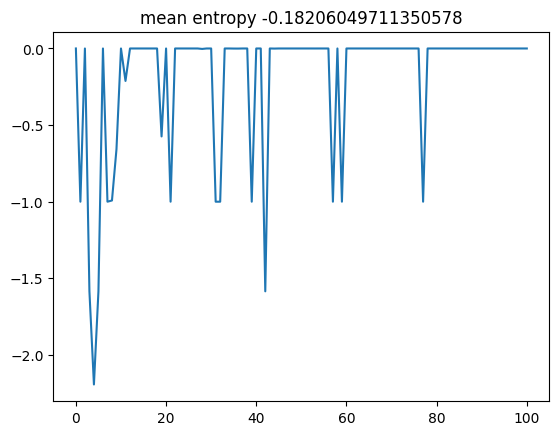

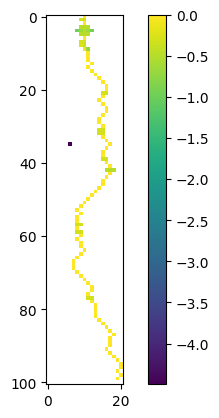

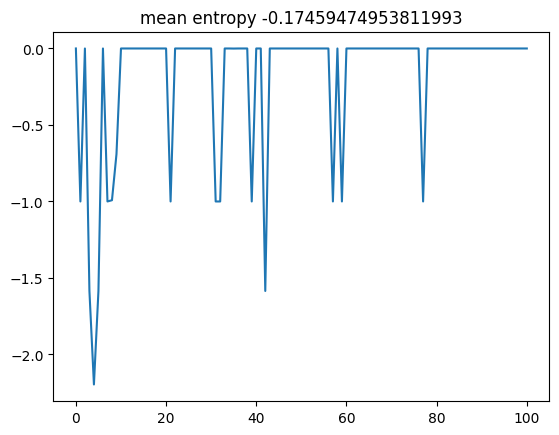

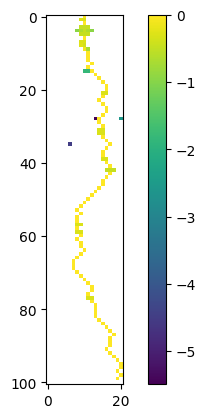

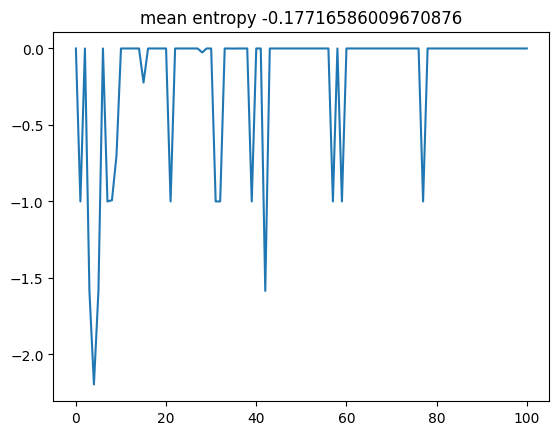

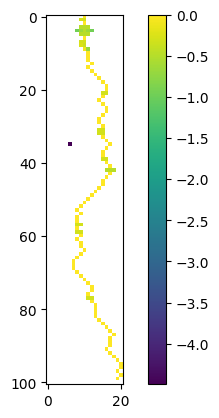

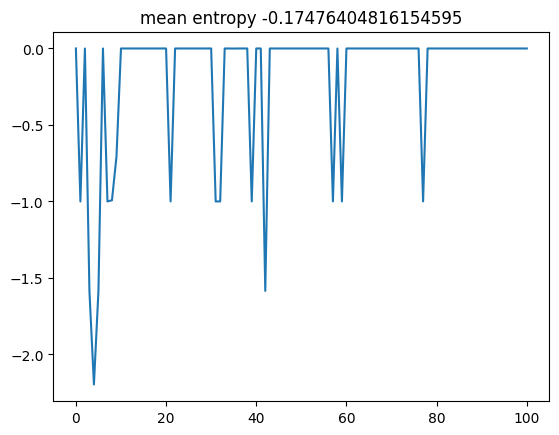

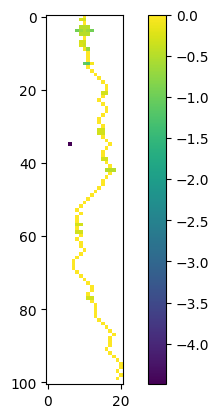

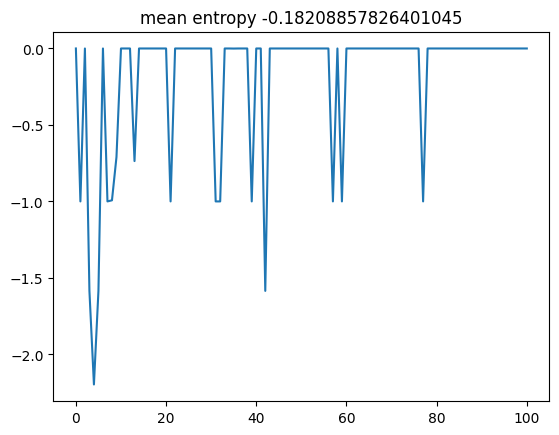

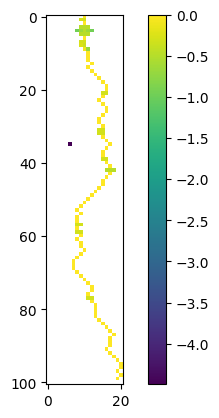

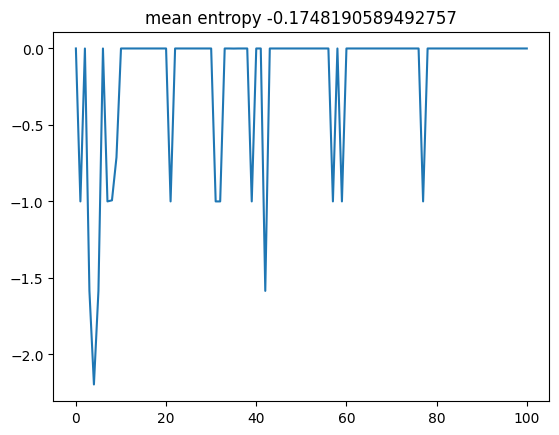

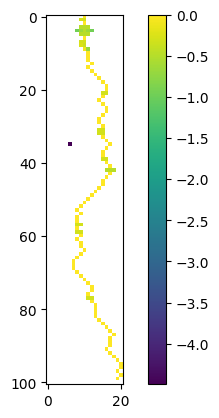

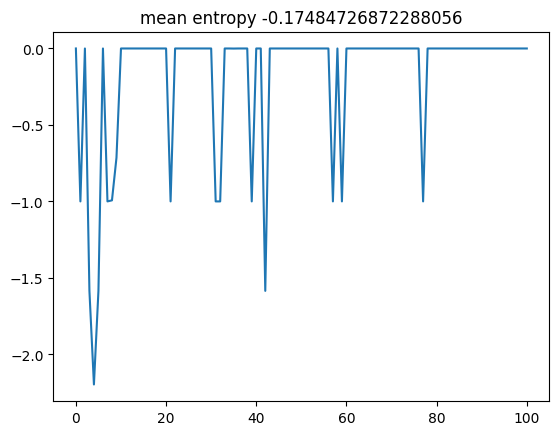

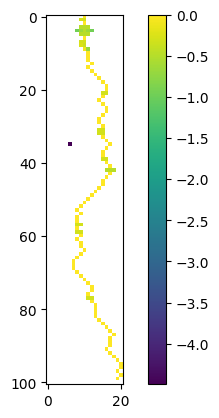

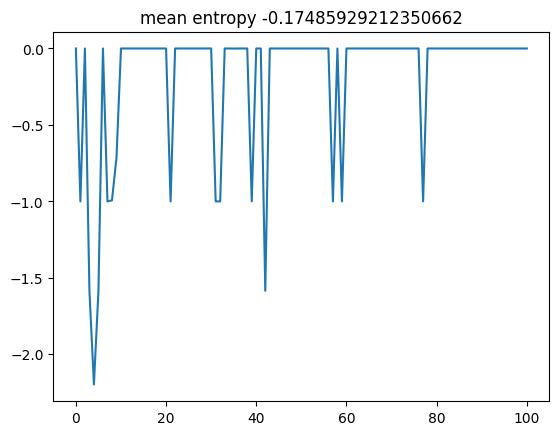

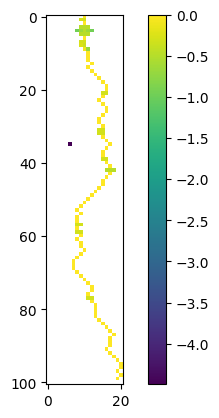

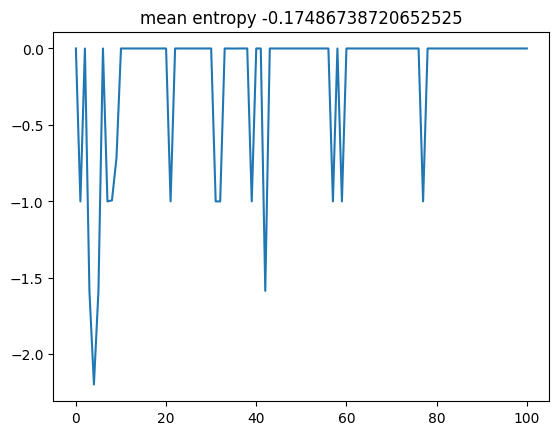

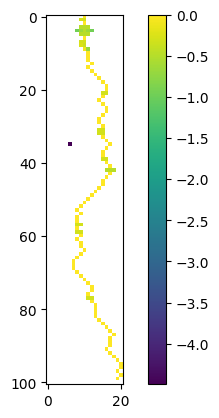

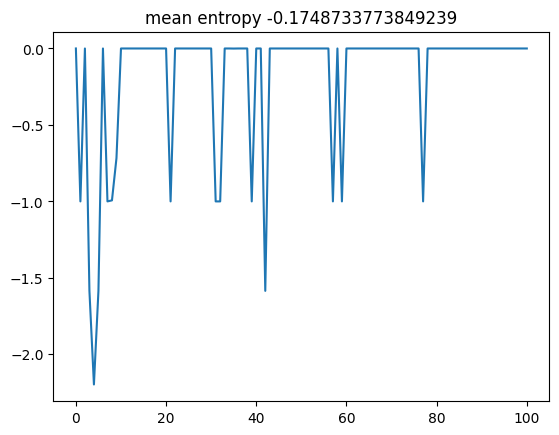

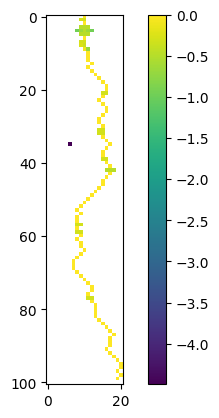

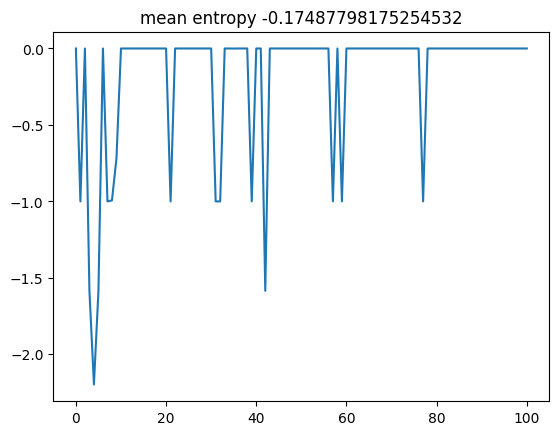

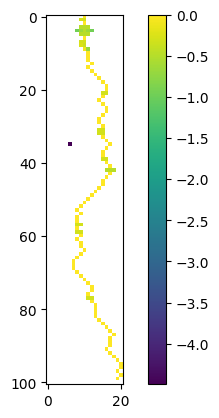

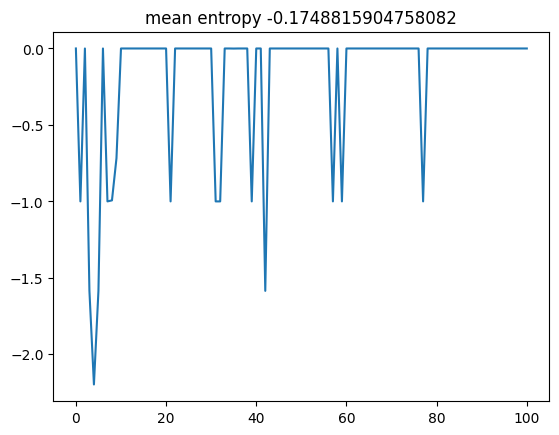

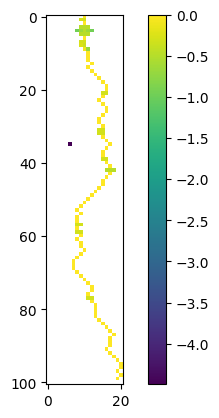

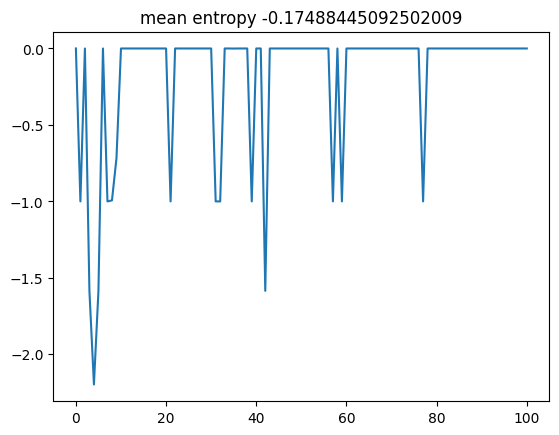

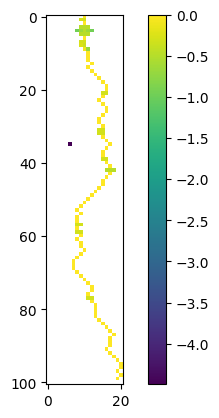

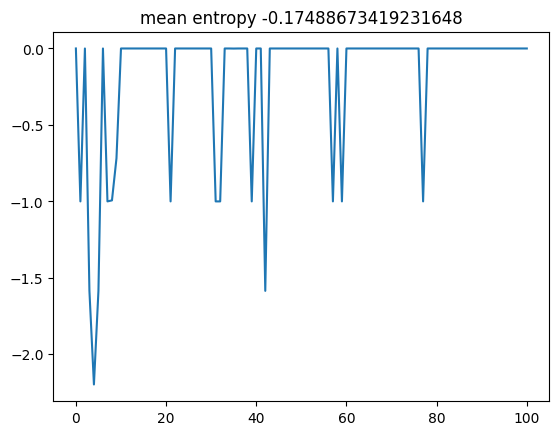

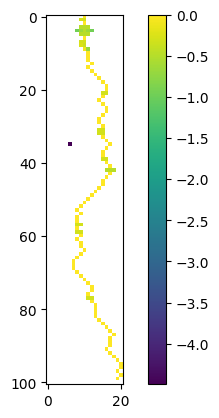

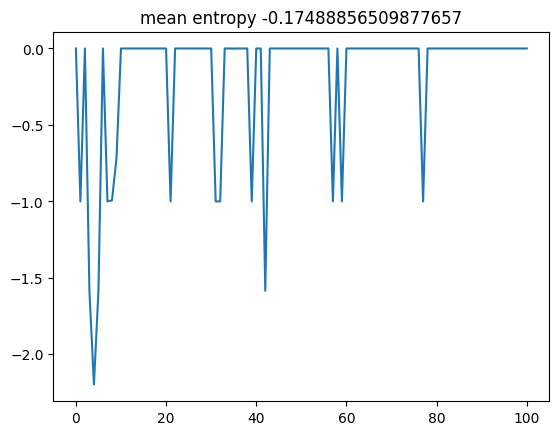

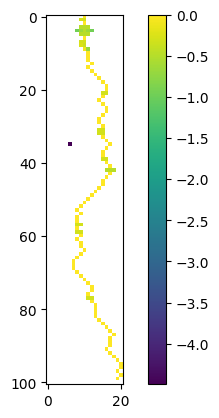

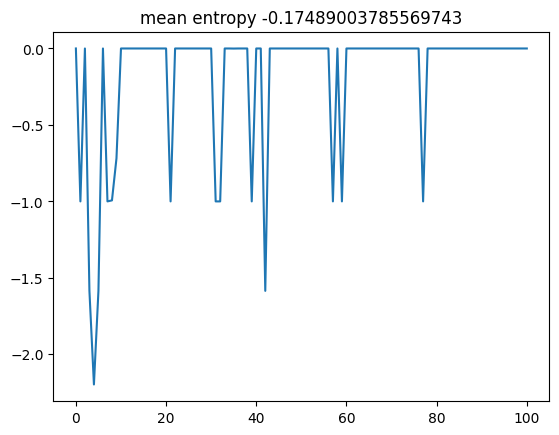

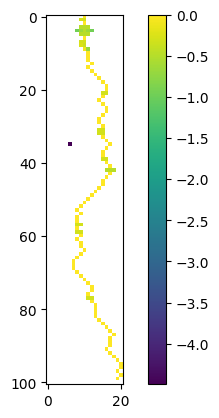

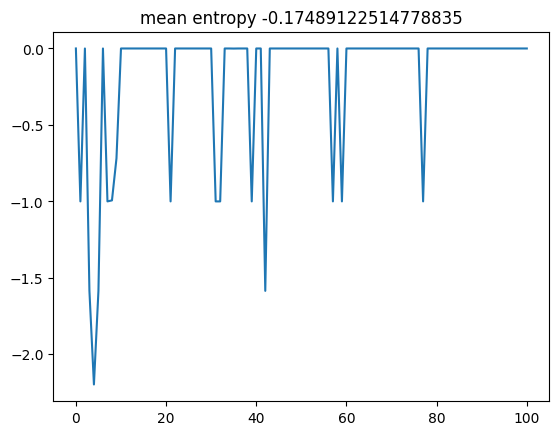

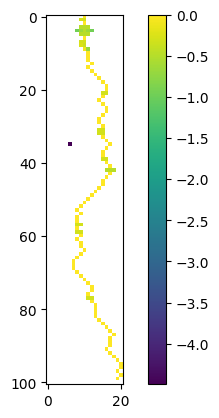

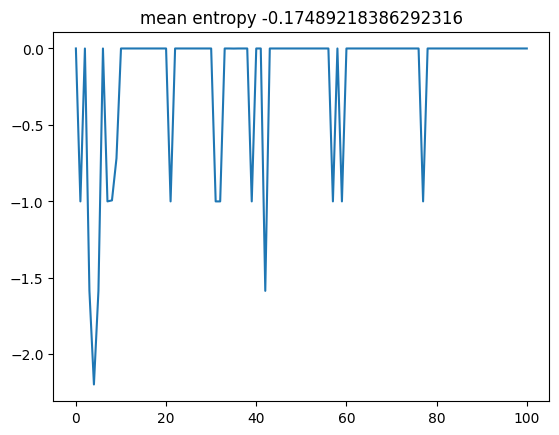

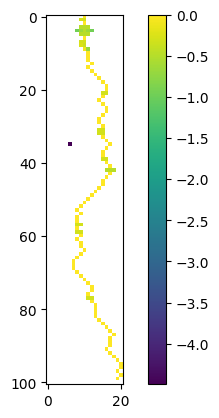

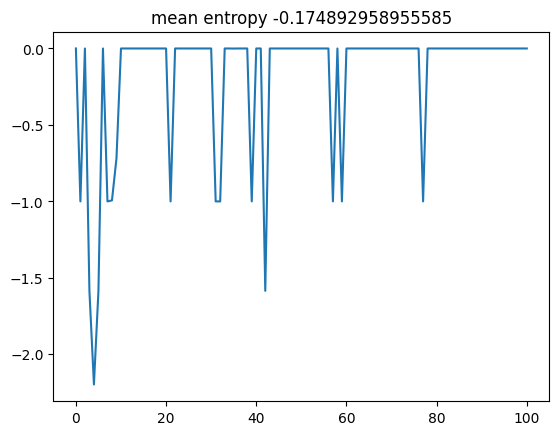

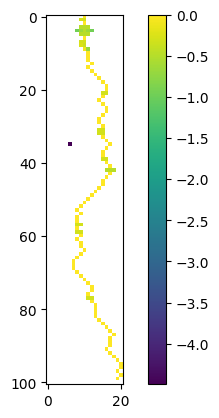

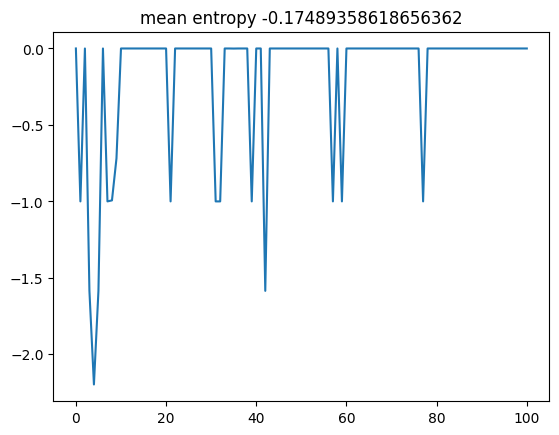

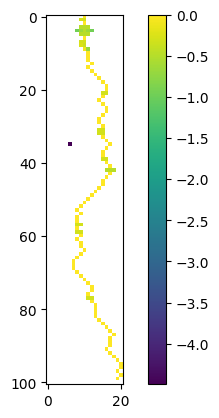

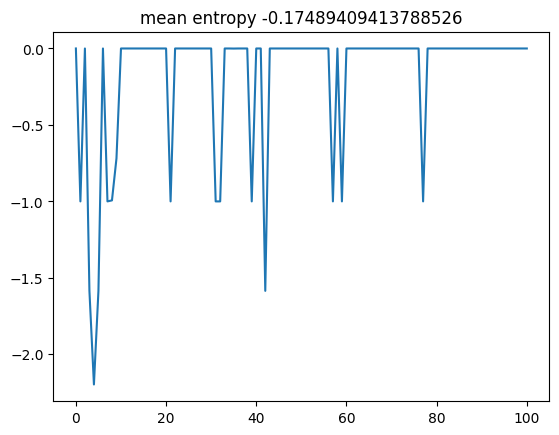

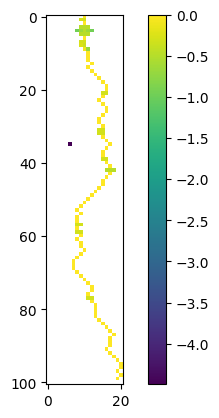

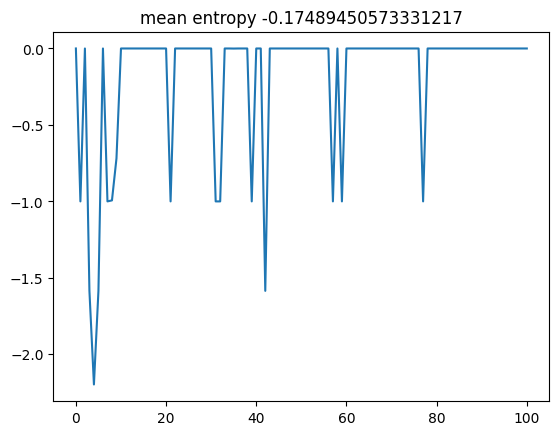

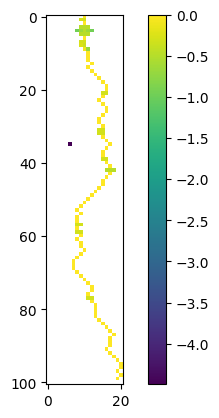

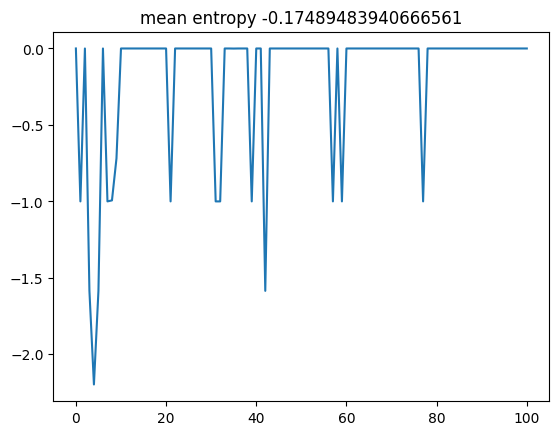

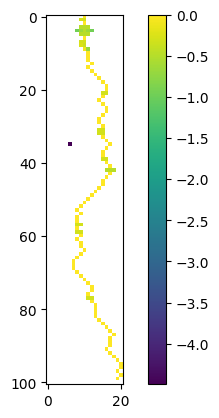

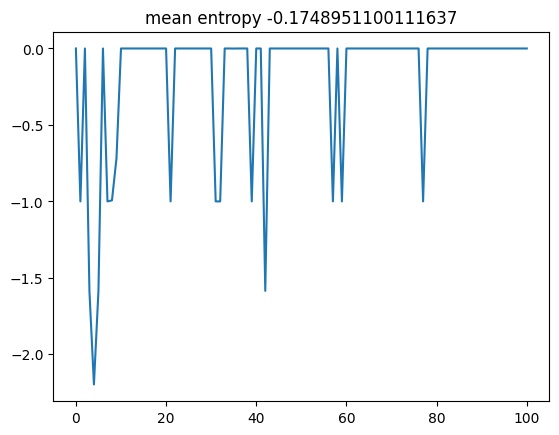

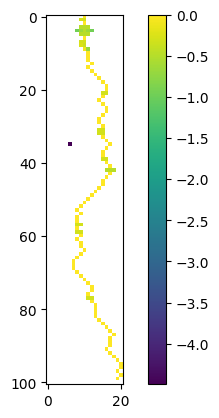

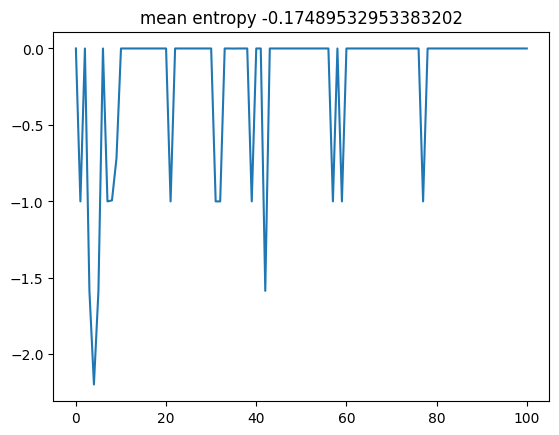

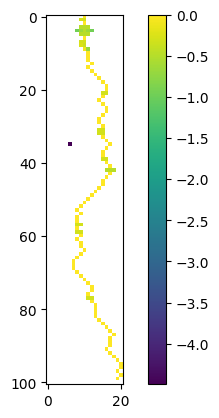

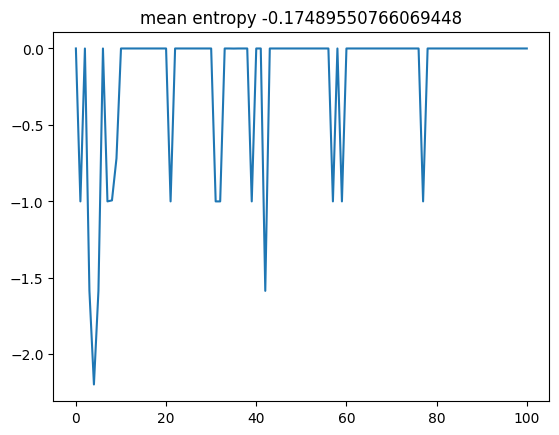

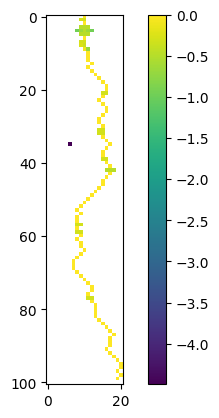

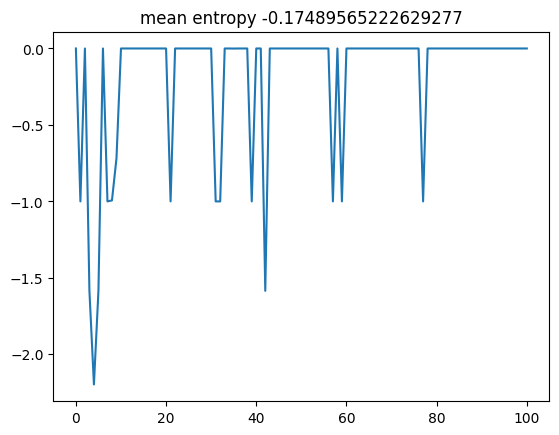

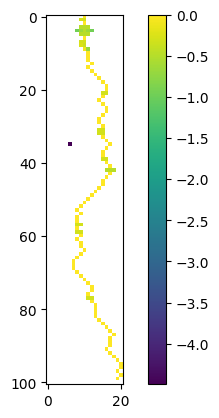

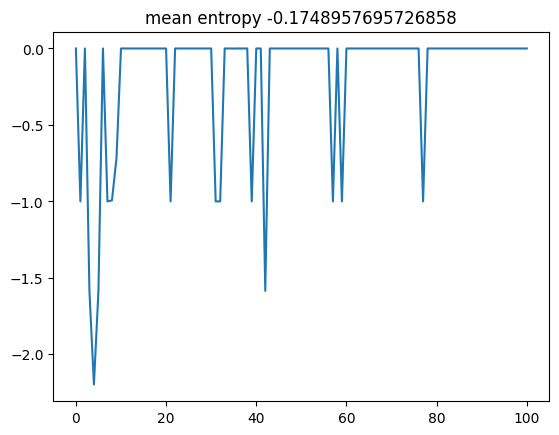

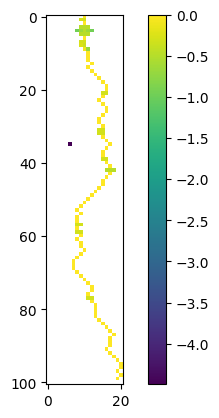

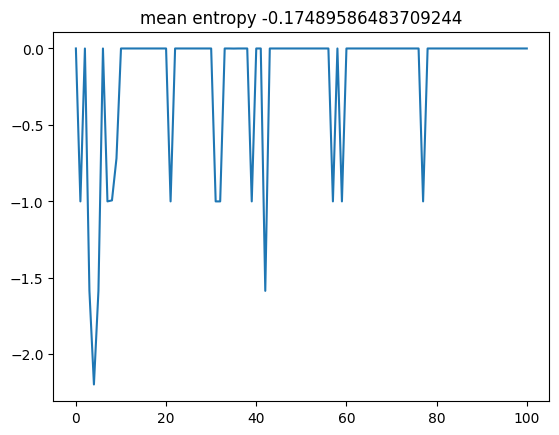

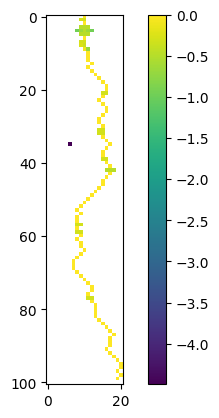

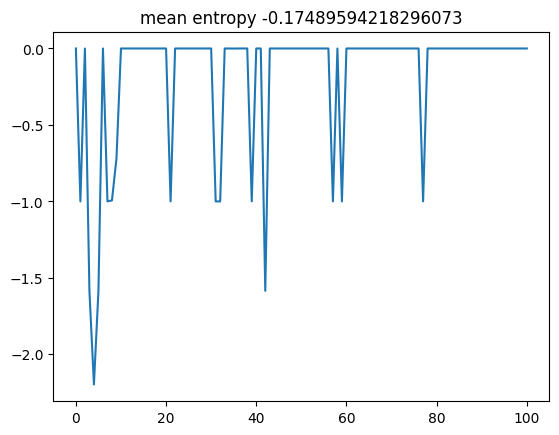

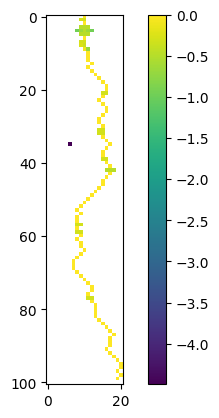

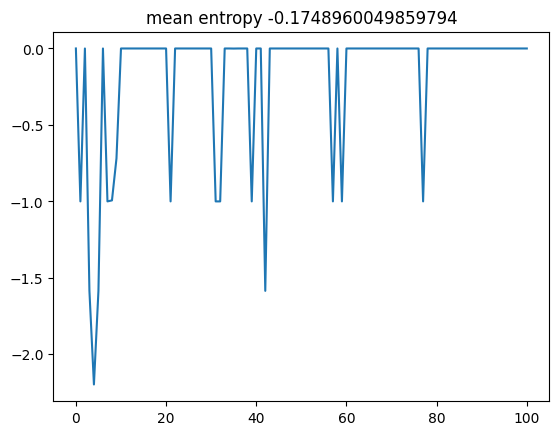

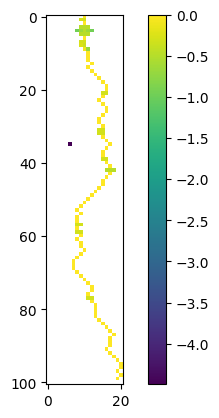

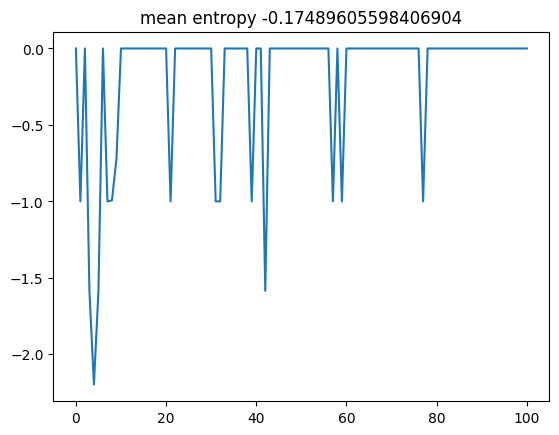

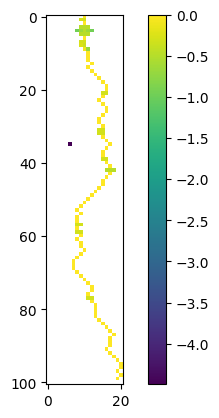

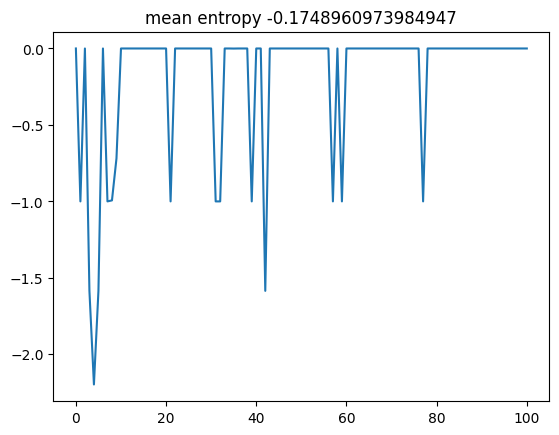

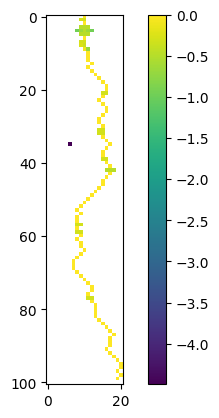

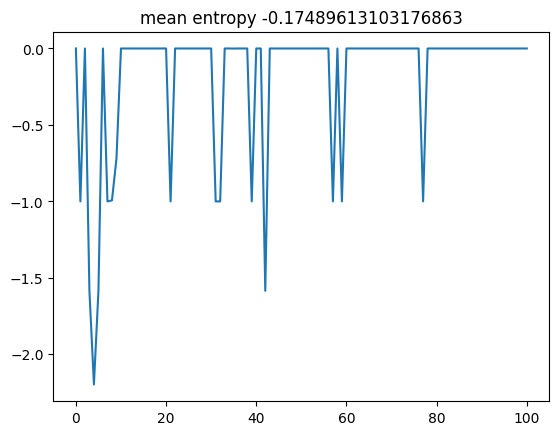

In [36]:
from cpp_modules import fastCA

np.random.seed(42)
width, height, ground_height, num_steps = 21, 101, 101*.1, 10000

initial_state = generate_initial_slope(height, width, ground_height, noise_amplitude = 0.2, noise_type = 'white')

add_central_flow(initial_state, flow_amount=1)


grids = np.zeros([num_steps, height, width, NUM_CELL_FLOATS])
grids[0] = initial_state


# plt.imshow(grids[-1,:,:,GROUND_HEIGHT] - initial_state[:,:,GROUND_HEIGHT])
# plt.imshow(grids[0,:,:,WATER_HEIGHT] )
# plt.colorbar()


params = {
    "EROSION_K": EROSION_K,
    "EROSION_C": EROSION_C,
    "EROSION_n": N,
    "EROSION_m": EROSION_EXPONENT,
}

fastCA.simulate(grids, params)

# print(grids)
# save_video(grids, 'videos/cpp_test.mp4')
# print(grids)

# # plt.imshow(grids[0,:,:,WATER_HEIGHT] )
# plt.imshow(grids[-1,:,:,WATER_HEIGHT] - grids[0,:,:,WATER_HEIGHT])
plt.imshow(np.log10(grids[-1,:,:,WATER_HEIGHT] * (grids[-1,:,:,WATER_HEIGHT] > 1e-6)) )
# plt.imshow(grids[-1,:,:,GROUND_HEIGHT] - grids[0,:,:,GROUND_HEIGHT])
plt.colorbar()
plt.savefig('../data/cpptest.png')
plt.show()

for gen in range(50):
    grids[0] = grids[-1]
    add_central_flow(grids[0], flow_amount=1)

    fastCA.simulate(grids, params)

    # plt.imshow(grids[-1,:,:,WATER_HEIGHT] - grids[0,:,:,WATER_HEIGHT])
    plt.imshow(np.log10(grids[-1,:,:,WATER_HEIGHT] * (grids[-1,:,:,WATER_HEIGHT] > 1e-6)) )
    # plt.imshow(grids[-1,:,:,GROUND_HEIGHT] - grids[0,:,:,GROUND_HEIGHT])
    plt.colorbar()
    plt.show()
    plot_entropies(grids[-1])


# def entropy(vec):
#     vec = np.maximum(0,vec)
#     entropy = np.sum(vec * (np.maximum(1e-100,np.log2(vec))))
#     return entropy

$E=\sum p(x)*log2(p(x))$